* This file takes a raw file and splits into per day files ( manually )
* The luigi task then processes each per day file, cleans, adds extra fields
* It also calcuates the runs and writes the output files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pandas as pd
import numpy as np
from datetime import datetime
import luigi

In [3]:
%matplotlib inline

In [5]:
from skitracker_utils import ProcessDirectory, ProcessTask


In [8]:
project_root = 'C:/Users/jjc/Projects/SkiTracker/'

In [142]:
input_file = 'raw_data_collected/giacomo_18Mar19.csv'

In [143]:
raw  =pd.read_csv(input_file, header=None, names=['Date','Time','Lat','Lon','GPS_Alt','Pressure','Pres_Alt','Temp','Batt'])

In [144]:
#remove the first line if its text
raw=raw[1:]
raw.shape

(24259, 9)

In [145]:
raw.Date.unique()

array(['03/18/2019 '], dtype=object)

In [146]:
raw_filter = raw[raw.Date=='03/18/2019 ']

In [147]:
raw_filter.shape

(24259, 9)

In [148]:
name = 'giacomo'
date = datetime(2019,3,18)
output_file = '{}_{}.pkl'.format(name,date.strftime('%d%b%y'))
output_file

'giacomo_18Mar19.pkl'

In [149]:
raw_filter.to_pickle('raw_split_files/'+output_file)

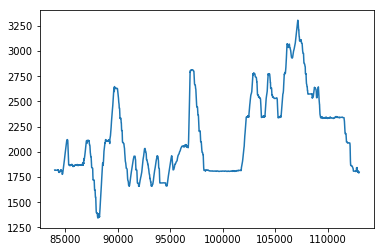

In [132]:
raw_filter.loc[84000:113000]['GPS_Alt'].plot()
#raw_filter['GPS_Alt'].plot()

### Luigi Process

In [25]:
process_all  = ProcessDirectory(inputDir=project_root+'raw_split_files/',outputDir=project_root+'processed_data/')

In [26]:
luigi.build([process_all],local_scheduler=True)

DEBUG: Checking if ProcessDirectory(inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=emily_19Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=giacomo_17Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=giacomo_18Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=josh_17Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/) is complete
DEBUG: Checking if ProcessTask(file_name=josh_18Mar19.pkl, in

INFO: [pid 4636] Worker Worker(salt=103339189, workers=1, host=LAPTOP-FPA715J2, username=jjc, pid=4636) done      ProcessTask(file_name=josh_20Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/)
DEBUG: 1 running tasks, waiting for next task to finish
INFO: Informed scheduler that task   ProcessTask_josh_20Mar19_pkl_C__Users_jjc_Pro_C__Users_jjc_Pro_cfdbe2cd9f   has status   DONE
DEBUG: Asking scheduler for work...
DEBUG: Pending tasks: 7
INFO: [pid 4636] Worker Worker(salt=103339189, workers=1, host=LAPTOP-FPA715J2, username=jjc, pid=4636) running   ProcessTask(file_name=josh_19Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split_files/, outputDir=C:/Users/jjc/Projects/SkiTracker/processed_data/)
INFO: [pid 4636] Worker Worker(salt=103339189, workers=1, host=LAPTOP-FPA715J2, username=jjc, pid=4636) done      ProcessTask(file_name=josh_19Mar19.pkl, inputDir=C:/Users/jjc/Projects/SkiTracker/raw_split

True

In [ ]:
# debug

In [19]:
df = pd.read_pickle('raw_split_files/josh_17Mar19.pkl')

In [20]:
df.head()

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt
26034,03/17/2019,08:44:03,45.097191,6.069313,0.0,1.100222e+10,1859.802,23.4,4.022
26035,03/17/2019,08:44:04,45.097191,6.069315,1867.0,1.100222e+10,1860.903,23.4,3.945
26036,03/17/2019,08:44:05,45.097191,6.069309,1867.1,1.100222e+10,1860.602,23.4,3.925
26037,03/17/2019,08:44:06,45.097195,6.069302,1867.2,1.100222e+10,1859.802,23.5,3.938
26038,03/17/2019,08:44:07,45.097195,6.069293,1867.0,1.100222e+10,1860.703,23.5,3.938


In [21]:
from skitracker_utils import find_routes, prepare_data

In [22]:
df = prepare_data(df)

In [23]:
runs = find_routes(df)

In [24]:
for i, run in enumerate(runs):
    print(i, run['scale'])

0 5.814194836983694
1 5.944191166440021
2 6.355485670423555
3 8.529248018342143
4 8.976568430178716
5 5.583955214190283
6 6.4812934693615105
7 4.6784004290629255
8 5.334170275938502
9 6.820314180491962
10 6.891502908832487
11 1.2122750699281015
